In [0]:
# import of necessary libraries
import pandas as pd

In [0]:
df = pd.read_csv('df.csv')

In [3]:
df.head()

,SL. no,Crop,Season,Temperature in C,Organic Content in %,Moisture in %,fertiliser %,pesticide usage %,estimated quality,Nitrogen %,Phosphorous %,Potassium %,Yield
0,1,Potato,Kharif & Rabbi,26,31,38,66,35,53,0.101,0.450,0.615,61
1,2,Potato,Kharif & Rabbi,30,54,35,46,45,72,0.116,0.490,0.806,77
2,3,Potato,Kharif & Rabbi,36,24,35,58,52,47,0.041,0.520,0.692,64
3,4,Potato,Kharif & Rabbi,28,24,67,65,56,44,0.115,0.464,0.606,72
4,5,Potato,Kharif & Rabbi,27,71,63,28,61,42,0.093,0.587,0.821,68


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 13 columns):
SL. no                  15000 non-null int64
Crop                    15000 non-null object
Season                  15000 non-null object
Temperature in C        15000 non-null int64
Organic Content in %    15000 non-null int64
Moisture in %           15000 non-null int64
fertiliser %            15000 non-null int64
pesticide usage %       15000 non-null int64
estimated quality       15000 non-null int64
Nitrogen %              15000 non-null float64
Phosphorous %           15000 non-null float64
Potassium %             15000 non-null float64
Yield                   15000 non-null int64
dtypes: float64(3), int64(8), object(2)
memory usage: 1.5+ MB


In [5]:
# drop unwanted columns 
df = df.drop(['SL. no', 'Crop', 'Season'], axis=1)
df.head()

,Temperature in C,Organic Content in %,Moisture in %,fertiliser %,pesticide usage %,estimated quality,Nitrogen %,Phosphorous %,Potassium %,Yield
0,26,31,38,66,35,53,0.101,0.450,0.615,61
1,30,54,35,46,45,72,0.116,0.490,0.806,77
2,36,24,35,58,52,47,0.041,0.520,0.692,64
3,28,24,67,65,56,44,0.115,0.464,0.606,72
4,27,71,63,28,61,42,0.093,0.587,0.821,68


In [0]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

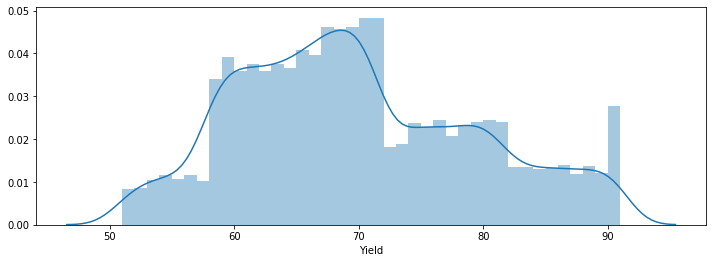

In [7]:
plt.figure(figsize=(12,4))
sns.distplot(df['Yield'],bins=40)

In [8]:
df.corr()

,Temperature in C,Organic Content in %,Moisture in %,fertiliser %,pesticide usage %,estimated quality,Nitrogen %,Phosphorous %,Potassium %,Yield
Temperature in C,1.000000,0.007393,0.003920,-0.003356,0.012499,-0.003157,0.008867,-0.001464,0.013690,0.002846
Organic Content in %,0.007393,1.000000,-0.002401,-0.771099,0.003294,0.585376,0.333643,0.510930,0.626375,0.606373
Moisture in %,0.003920,-0.002401,1.000000,-0.167352,-0.018947,0.069663,-0.008143,0.012131,0.006683,0.098861
fertiliser %,-0.003356,-0.771099,-0.167352,1.000000,-0.001074,-0.680009,-0.340431,-0.539596,-0.653016,-0.724249
pesticide usage %,0.012499,0.003294,-0.018947,-0.001074,1.000000,-0.410598,-0.003407,-0.006123,0.008055,-0.214644
estimated quality,-0.003157,0.585376,0.069663,-0.680009,-0.410598,1.000000,0.271549,0.409579,0.490316,0.746028
Nitrogen %,0.008867,0.333643,-0.008143,-0.340431,-0.003407,0.271549,1.000000,0.228382,0.282388,0.271298
Phosphorous %,-0.001464,0.510930,0.012131,-0.539596,-0.006123,0.409579,0.228382,1.000000,0.440066,0.427913
Potassium %,0.013690,0.626375,0.006683,-0.653016,0.008055,0.490316,0.282388,0.440066,1.000000,0.509869
Yield,0.002846,0.606373,0.098861,-0.724249,-0.214644,0.746028,0.271298,0.427913,0.509869,1.000000


In [9]:
# from the above correlation we can say temperature 
# is not really affecting many continuous features
# so no need for temperature
df = df.drop(['Temperature in C'], axis=1)
df.corr()

,Organic Content in %,Moisture in %,fertiliser %,pesticide usage %,estimated quality,Nitrogen %,Phosphorous %,Potassium %,Yield
Organic Content in %,1.000000,-0.002401,-0.771099,0.003294,0.585376,0.333643,0.510930,0.626375,0.606373
Moisture in %,-0.002401,1.000000,-0.167352,-0.018947,0.069663,-0.008143,0.012131,0.006683,0.098861
fertiliser %,-0.771099,-0.167352,1.000000,-0.001074,-0.680009,-0.340431,-0.539596,-0.653016,-0.724249
pesticide usage %,0.003294,-0.018947,-0.001074,1.000000,-0.410598,-0.003407,-0.006123,0.008055,-0.214644
estimated quality,0.585376,0.069663,-0.680009,-0.410598,1.000000,0.271549,0.409579,0.490316,0.746028
Nitrogen %,0.333643,-0.008143,-0.340431,-0.003407,0.271549,1.000000,0.228382,0.282388,0.271298
Phosphorous %,0.510930,0.012131,-0.539596,-0.006123,0.409579,0.228382,1.000000,0.440066,0.427913
Potassium %,0.626375,0.006683,-0.653016,0.008055,0.490316,0.282388,0.440066,1.000000,0.509869
Yield,0.606373,0.098861,-0.724249,-0.214644,0.746028,0.271298,0.427913,0.509869,1.000000


(10, 0)

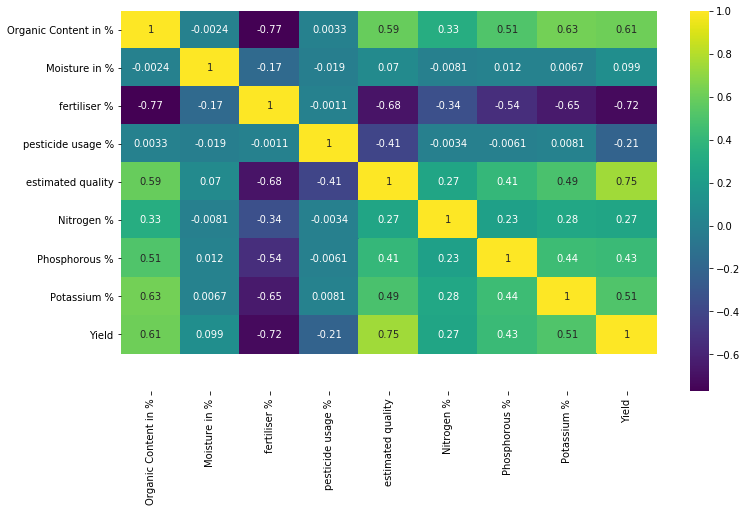

In [10]:
# visualise the correlation between variables
plt.figure(figsize=(12,7))
sns.heatmap(df.corr(),annot=True,cmap='viridis')
plt.ylim(10, 0)

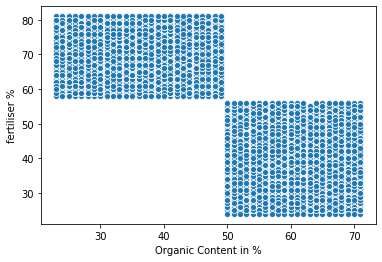

In [11]:
sns.scatterplot(x='Organic Content in %',y='fertiliser %',data=df,)

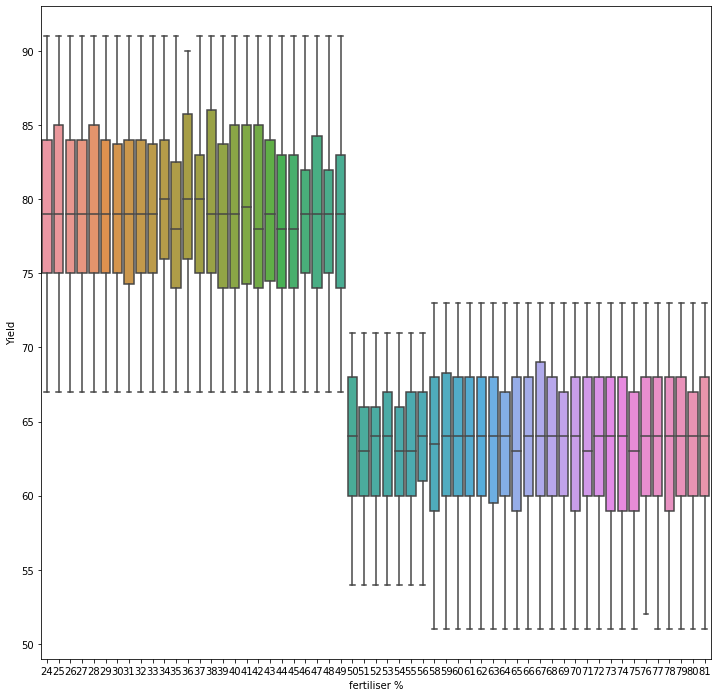

In [12]:
plt.figure(figsize=(12,12))
sns.boxplot(x='fertiliser %',y='Yield',data=df)

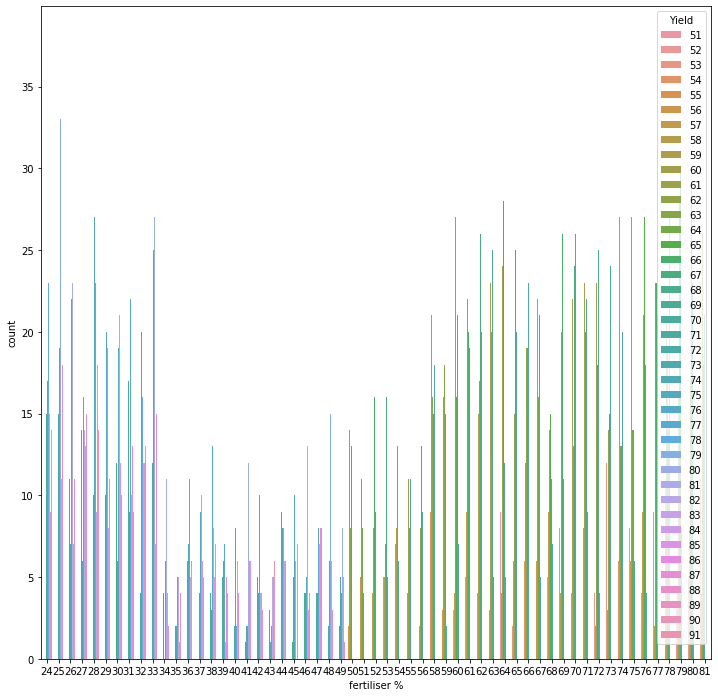

In [13]:
plt.figure(figsize=(12,12))
sns.countplot(x='fertiliser %',data=df,hue='Yield')

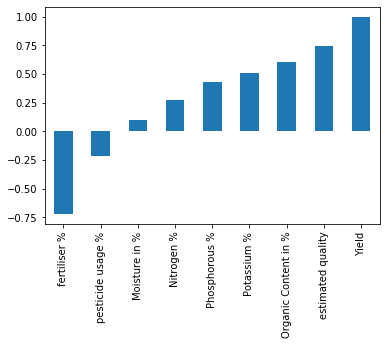

In [14]:
df.corr()['Yield'].sort_values().plot(kind='bar')

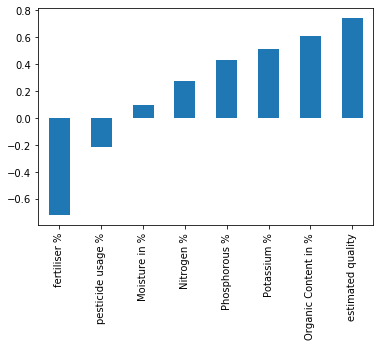

In [15]:
df.corr()['Yield'].sort_values().drop('Yield').plot(kind='bar')

In [16]:
len(df)

15000

In [17]:
df.isnull().sum()

Organic Content in %    0
Moisture in %           0
fertiliser %            0
pesticide usage %       0
estimated quality       0
Nitrogen %              0
Phosphorous %           0
Potassium %             0
Yield                   0
dtype: int64

In [18]:
# renaming of columns for better understanding and analysis
df = df.rename(columns={"Organic Content in %":"Organic",
                        "Moisture in %":"Moisture",
                        "Nitrogen %":"N",
                        "Phosphorous %":"P",
                        "Potassium %": "K",
                        "fertiliser %": "Fertiliser",
                        "pesticide usage %": "Pesticide",
                        "estimated quality":"q"})
df.head()

,Organic,Moisture,Fertiliser,Pesticide,q,N,P,K,Yield
0,31,38,66,35,53,0.101,0.450,0.615,61
1,54,35,46,45,72,0.116,0.490,0.806,77
2,24,35,58,52,47,0.041,0.520,0.692,64
3,24,67,65,56,44,0.115,0.464,0.606,72
4,71,63,28,61,42,0.093,0.587,0.821,68


In [0]:
# check & change data type of Season_n, Crop_n, and the rest
df['Organic'] = df['Organic'].astype(np.float64)
df['Moisture'] = df['Moisture'].astype(np.float64)
df['Fertiliser'] = df['Fertiliser'].astype(np.float64)
df['Pesticide'] = df['Pesticide'].astype(np.float64)
df['q'] = df['q'].astype(np.float64)
df['Yield'] = df['Yield'].astype(np.float64)

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
X = df.drop('Yield',axis=1)
y = df['Yield']

In [22]:
X

,Organic,Moisture,Fertiliser,Pesticide,q,N,P,K
0,31.0,38.0,66.0,35.0,53.0,0.101,0.450,0.615
1,54.0,35.0,46.0,45.0,72.0,0.116,0.490,0.806
2,24.0,35.0,58.0,52.0,47.0,0.041,0.520,0.692
3,24.0,67.0,65.0,56.0,44.0,0.115,0.464,0.606
4,71.0,63.0,28.0,61.0,42.0,0.093,0.587,0.821
...,...,...,...,...,...,...,...,...
14995,33.0,38.0,66.0,42.0,57.0,0.118,0.506,0.746
14996,28.0,68.0,68.0,46.0,57.0,0.082,0.451,0.578
14997,48.0,40.0,80.0,50.0,31.0,0.089,0.395,0.697
14998,63.0,56.0,25.0,34.0,86.0,0.117,0.462,0.742


In [23]:
y

0        61.0
1        77.0
2        64.0
3        72.0
4        68.0
         ... 
14995    63.0
14996    62.0
14997    70.0
14998    81.0
14999    56.0
Name: Yield, Length: 15000, dtype: float64

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=101)

In [25]:
X_train.shape

(12750, 8)

In [0]:
# Normalise data to prevent data leak
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [27]:
# Model creation
%tensorflow_version 2.x
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.constraints import max_norm

TensorFlow 2.x selected.


In [0]:
model = Sequential()

# input layer
model.add(Dense(8,  activation='relu'))

# hidden layer
model.add(Dense(8, activation='relu'))

# hidden layer
model.add(Dense(8, activation='relu'))

# hidden layer
model.add(Dense(5, activation='relu'))
model.add(Dense(3, activation='relu'))


# output layer
model.add(Dense(1))

# Compile model
model.compile(loss='mse', optimizer='adam')

In [29]:
model.fit(x=X_train,y=y_train.values,
          validation_data=(X_test,y_test.values),
          batch_size=256,epochs=30)

Train on 12750 samples, validate on 2250 samples
Epoch 1/30
12750/12750 [==============================] - 1s 64us/sample - loss: 4908.7175 - val_loss: 4857.9269
Epoch 2/30
12750/12750 [==============================] - 0s 9us/sample - loss: 4722.6620 - val_loss: 4492.1769
Epoch 3/30
12750/12750 [==============================] - 0s 8us/sample - loss: 3936.9830 - val_loss: 3065.0055
Epoch 4/30
12750/12750 [==============================] - 0s 9us/sample - loss: 1734.9702 - val_loss: 435.5404
Epoch 5/30
12750/12750 [==============================] - 0s 9us/sample - loss: 156.6922 - val_loss: 108.8351
Epoch 6/30
12750/12750 [==============================] - 0s 8us/sample - loss: 102.9763 - val_loss: 104.6422
Epoch 7/30
12750/12750 [==============================] - 0s 8us/sample - loss: 100.1647 - val_loss: 101.9453
Epoch 8/30
12750/12750 [==============================] - 0s 8us/sample - loss: 97.5705 - val_loss: 99.2844
Epoch 9/30
12750/12750 [==============================] - 0s 8us/

In [0]:
from tensorflow.keras.models import load_model

In [0]:
model.save('major_project_model.h5')  

In [0]:
losses = pd.DataFrame(model.history.history)

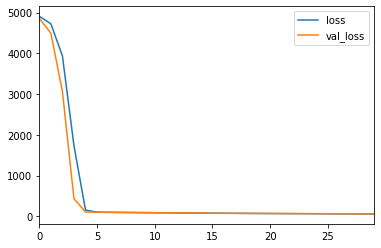

In [33]:
losses[['loss','val_loss']].plot()

In [0]:
# Model evaluation
from sklearn.metrics import classification_report,confusion_matrix,mean_squared_error,mean_absolute_error,explained_variance_score
predictions = model.predict(X_test)

In [35]:
predictions

array([[82.890015],
       [57.233837],
       [55.503155],
       ...,
       [81.69966 ],
       [64.59298 ],
       [71.155136]], dtype=float32)

In [36]:
mean_absolute_error(y_test,predictions)

6.262698933919271

In [37]:
np.sqrt(mean_squared_error(y_test,predictions))

7.888469366491972

In [38]:
explained_variance_score(y_test,predictions)

0.3129636776062499

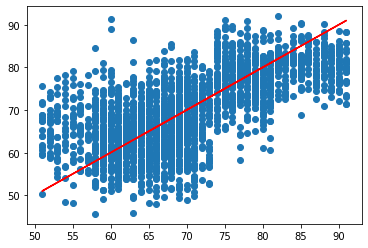

In [39]:
# Our predictions
plt.scatter(y_test,predictions)

# Perfect predictions
plt.plot(y_test,y_test,'r')

In [40]:
p1 = df.drop('Yield',axis=1).iloc[0]
p1

Organic       31.000
Moisture      38.000
Fertiliser    66.000
Pesticide     35.000
q             53.000
N              0.101
P              0.450
K              0.615
Name: 0, dtype: float64

In [0]:
p1 = scaler.transform(p1.values.reshape(-1, 8))

In [42]:
p1

array([[0.16666667, 0.11764706, 0.73684211, 0.10344828, 0.40350877,
        0.61      , 0.34782609, 0.30645161]])

In [43]:
model.predict(p1)

array([[58.273228]], dtype=float32)

In [44]:
df.iloc[0]

Organic       31.000
Moisture      38.000
Fertiliser    66.000
Pesticide     35.000
q             53.000
N              0.101
P              0.450
K              0.615
Yield         61.000
Name: 0, dtype: float64

In [0]:
p = model.predict(p1)
v = df.iloc[0][8]

In [46]:
v

61.0

In [47]:
p[0][0]

58.273228

In [48]:
print(f'Predicted Value- {p[0][0]}')
print(f'Actual Value- {v}')

Predicted Value- 58.27322769165039
Actual Value- 61.0
